In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score ,mean_squared_error
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [65]:
iris = load_iris()
X=iris.data
y=iris.target

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
components_list=[1,2,3,4]
r2_scores=[]
mse_scores=[]


In [69]:
for n in components_list:
    
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)  # Corrected this line
    
    svr = SVR(kernel='linear')  # 'linear' should be lowercase
    svr.fit(X_train_pca, y_train)
    y_pred = svr.predict(X_test_pca)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    r2_scores.append(r2)
    mse_scores.append(mse)
    
    print(f"PCA components: {n} → R2: {r2:.4f}, MSE: {mse:.4f}")


PCA components: 1 → R2: 0.9124, MSE: 0.0612
PCA components: 2 → R2: 0.9123, MSE: 0.0613
PCA components: 3 → R2: 0.9528, MSE: 0.0330
PCA components: 4 → R2: 0.9529, MSE: 0.0329


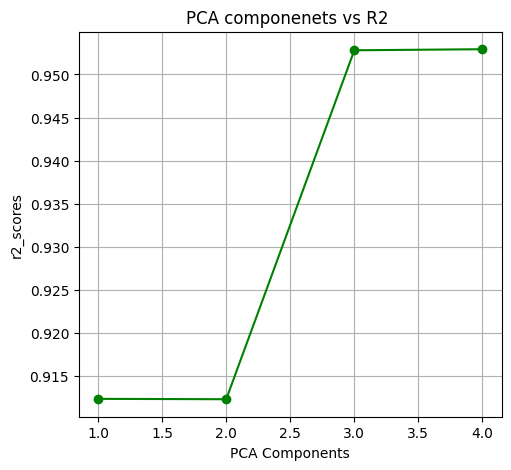

In [70]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(components_list,r2_scores,color='green',marker='o')
plt.ylabel("r2_scores")
plt.xlabel("PCA Components")
plt.title("PCA componenets vs R2 ")
plt.grid(True)
plt.show()

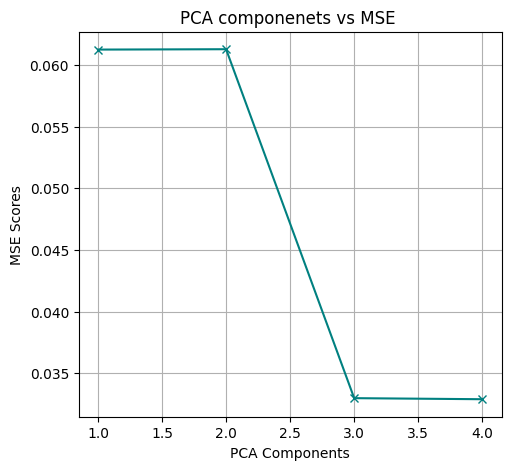

In [71]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(components_list,mse_scores,color='teal',marker='x')
plt.ylabel("MSE Scores")
plt.xlabel("PCA Components")
plt.title("PCA componenets vs MSE ")
plt.grid(True)
plt.show()